In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [2]:
def rotate(p, pitch, roll, yaw):
    pitch, roll, yaw = np.radians(pitch), np.radians(roll), np.radians(yaw)
    
    cosa, sina = np.cos(yaw), np.sin(yaw)
    cosb, sinb = np.cos(pitch), np.sin(pitch)
    cosc, sinc = np.cos(roll), np.sin(roll)
    
    Axx = cosa*cosb
    Axy = cosa*sinb*sinc - sina*cosc
    Axz = cosa*sinb*cosc + sina*sinc

    Ayx = sina*cosb
    Ayy = sina*sinb*sinc + cosa*cosc
    Ayz = sina*sinb*cosc - cosa*sinc
    
    Azx = -sinb
    Azy = cosb*sinc
    Azz = cosb*cosc
    
    X = Axx*p[0] + Axy*p[1] + Axz*p[2]
    Y = Ayx*p[0] + Ayy*p[1] + Ayz*p[2]
    Z = Azx*p[0] + Azy*p[1] + Azz*p[2]
    
    return X, Y, Z

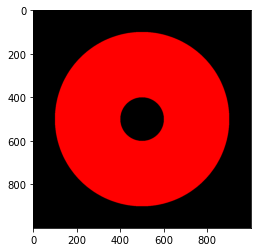

In [3]:
img = np.empty((1000, 1000, 3), dtype=np.float32)
img[:,:,:] = 0.

c = (500, 500)

dl = np.arange(0, img.shape[0], 1)
x, y = np.meshgrid(dl, dl)
r = np.sqrt((x-c[0])**2 + (y-c[1])**2)

m = (r < 400.) & (r > 100.)
img[m,:] = (1., 0., 0.)
plt.imshow(img)

In [4]:
img = cv2.imread("/home/preqsis/Plocha/sim/logos/frame_008000.png")

# input points
# okraje obrazku
a = (0, 0, 0)
b = (0, img.shape[1], 0)
c = (img.shape[0], 0, 0)
d = (img.shape[0], img.shape[1], 0)
input_pts = np.float32([a[:2], b[:2], c[:2], d[:2]])

# output points
pitch, roll, yaw = 145., -45., 0.
A = rotate(a, pitch, roll, yaw)
B = rotate(b, pitch, roll, yaw)
C = rotate(c, pitch, roll, yaw)
D = rotate(d, pitch, roll, yaw)
output_pts = np.float32([A[:2], B[:2], C[:2], D[:2]])

# translace
# aby to neutikalo mimo obrazek
tns = np.array((np.min(output_pts[:,0]), np.min(output_pts[:,1])))
output_pts[:] -= tns

# velikost vysledneho obrazku
# aby se do nej rotovany vesel
h = np.max(output_pts[:,1]) - np.min(output_pts[:,1])
w = np.max(output_pts[:,0]) - np.min(output_pts[:,0])

# warp perspektivy
M = cv2.getPerspectiveTransform(input_pts,output_pts)
out = cv2.warpPerspective(img, M, (w, h), cv2.INTER_LINEAR, cv2.BORDER_CONSTANT,  1)

# zapis vysledku
cv2.imwrite("/home/preqsis/Plocha/test.png", out)

AttributeError: 'NoneType' object has no attribute 'shape'